In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('dataset.csv')

# Features and labels
X = data[['Class1', 'Class2']].values
Y = data['Class3'].values.reshape(-1, 1)

# Normalize inputs
X = X / np.max(X, axis=0)


In [2]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2  # Two input features
        hiddenLayer1Neurons = 8
        hiddenLayer2Neurons = 8
        hiddenLayer3Neurons = 8
        outLayerNeurons = 3  # Three output classes

        self.learning_rate = 0.01

        # Initialize weights and biases
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons) * 0.1
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons) * 0.1
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons) * 0.1
        self.W_OH = np.random.randn(hiddenLayer3Neurons, outLayerNeurons) * 0.1

        self.b_H1 = np.zeros((1, hiddenLayer1Neurons))
        self.b_H2 = np.zeros((1, hiddenLayer2Neurons))
        self.b_H3 = np.zeros((1, hiddenLayer3Neurons))
        self.b_OH = np.zeros((1, outLayerNeurons))

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        # Forward pass
        self.Z_H1 = np.dot(X, self.W_H1) + self.b_H1
        self.A_H1 = self.sigmoid(self.Z_H1)

        self.Z_H2 = np.dot(self.A_H1, self.W_H2) + self.b_H2
        self.A_H2 = self.sigmoid(self.Z_H2)

        self.Z_H3 = np.dot(self.A_H2, self.W_H3) + self.b_H3
        self.A_H3 = self.sigmoid(self.Z_H3)

        self.Z_OH = np.dot(self.A_H3, self.W_OH) + self.b_OH
        pred = self.softmax(self.Z_OH)
        return pred

    def backPropagation(self, X, Y, pred):
        # Backpropagation for softmax and sigmoid layers
        m = X.shape[0]

        output_error = pred - Y
        dW_OH = np.dot(self.A_H3.T, output_error) / m
        db_OH = np.sum(output_error, axis=0, keepdims=True) / m

        hidden3_error = np.dot(output_error, self.W_OH.T) * self.sigmoid(self.A_H3, der=True)
        dW_H3 = np.dot(self.A_H2.T, hidden3_error) / m
        db_H3 = np.sum(hidden3_error, axis=0, keepdims=True) / m

        hidden2_error = np.dot(hidden3_error, self.W_H3.T) * self.sigmoid(self.A_H2, der=True)
        dW_H2 = np.dot(self.A_H1.T, hidden2_error) / m
        db_H2 = np.sum(hidden2_error, axis=0, keepdims=True) / m

        hidden1_error = np.dot(hidden2_error, self.W_H2.T) * self.sigmoid(self.A_H1, der=True)
        dW_H1 = np.dot(X.T, hidden1_error) / m
        db_H1 = np.sum(hidden1_error, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W_OH -= self.learning_rate * dW_OH
        self.b_OH -= self.learning_rate * db_OH

        self.W_H3 -= self.learning_rate * dW_H3
        self.b_H3 -= self.learning_rate * db_H3

        self.W_H2 -= self.learning_rate * dW_H2
        self.b_H2 -= self.learning_rate * db_H2

        self.W_H1 -= self.learning_rate * dW_H1
        self.b_H1 -= self.learning_rate * db_H1

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)


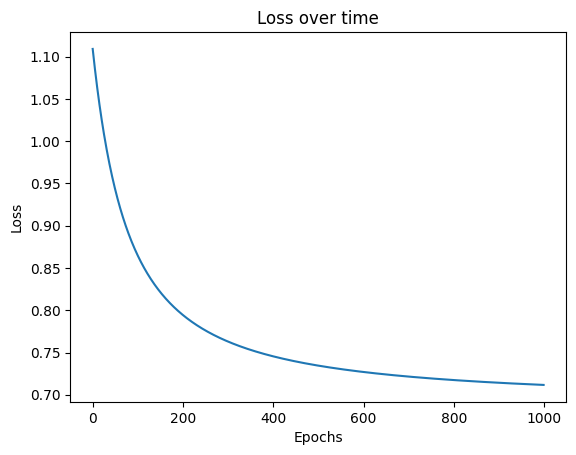

In [3]:
# Initialize the neural network
NN = NeuralNetwork()

# One-hot encoding for output labels
Y_onehot = np.zeros((Y.shape[0], 3))
Y_onehot[np.arange(Y.shape[0]), Y.flatten()] = 1

# Train the model
epochs = 1000
err = []
for i in range(epochs):
    NN.train(X, Y_onehot)
    loss = -np.sum(Y_onehot * np.log(NN.feedForward(X) + 1e-8)) / X.shape[0]
    err.append(loss)

# Plot the loss
plt.plot(err)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over time')
plt.show()


In [7]:
def test_model_by_row_col(row, col1, col2):
    input_data = X[row, [col1, col2]]
    prediction = NN.feedForward(input_data.reshape(1, -1))
    print(f"Prediction for Row {row}, Columns {col1} & {col2}: {prediction}")

In [8]:
test_model_by_row_col(23, 0, 1)

Prediction for Row 23, Columns 0 & 1: [[0.4491262  0.52939579 0.02147802]]


In [9]:
test_model_by_row_col(7, 0, 1)

Prediction for Row 7, Columns 0 & 1: [[0.44912439 0.52939782 0.02147779]]


In [10]:
test_model_by_row_col(44, 0, 1)

Prediction for Row 44, Columns 0 & 1: [[0.44912627 0.52939727 0.02147646]]
